# Accessing FAO ASIS data

In this exercise we download the Vegetation Health Index (VHI) and Agricultural Stress Index (ASI) for an administrative region and identify the specific areas most impacted by drought.

More information on ASIS: https://www.fao.org/giews/earthobservation/index.jsp?lang=en

Before we start, we need to install some required python packages.

In [ ]:
!pip install rasterio

The following cell ensures a correct download of the data from Google Cloud Storage.

In [1]:
import os
os.environ['GS_NO_SIGN_REQUEST'] = 'YES'

In [16]:
# Available data in ASIS:

from vito_agri_tutorials.fao.asis import ASIS_SUPPORTED_VARIABLES
import pandas as pd

df_vars = pd.DataFrame.from_dict(ASIS_SUPPORTED_VARIABLES, orient='index', columns=['Description'])
df_vars

,Description
VCI-D,Vegetation Condition Index - Dekadal
VCI-M,Vegetation Condition Index - Monthly
VHI-D,Vegetation Health Index - Dekadal
VHI-M,Vegetation Health Index - Monthly
MVHI-D,Mean Vegetation Health Index - Dekadal
MVHI-A,Mean Vegetation Health Index - Seasonal
ASI-D,Agricultural Stress Index - Dekadal
ASI-A,Agricultural Stress Index - Seasonal
DI-D,Drought Intensity - Dekadal
DI-A,Drought Intensity - Seasonal


In [ ]:
# Using this widget, you can select an administrave region from a list of available regions in a country.
# Select a country first.
# Then select a state from the list of states in the selected country.
# Hit the "Add to selection" button to add the selected state to your selection.

# Select one or two states from one country and add them to your selection.

from vito_agri_tutorials.utils.map import RegionPicker

region_picker = RegionPicker()

In [ ]:
# In this cell we extract the geometries from the selected states.

gdf = region_picker.selection_to_gdf(level=1)
gdf

,ADM1_CODE,id,STR1_YEAR,EXP1_YEAR,STATUS,DISP_AREA,ADM0_CODE,ADM0_NAME,Shape_Leng,Shape_Area,geometry
349,3432,Northern,1000,3000,Member State,NO,270,Zambia,22.458684,12.300279,"MULTIPOLYGON (((30.78884 -8.25962, 31.07797 -8..."
350,3433,Southern,1000,3000,Member State,NO,270,Zambia,13.581243,7.270973,"MULTIPOLYGON (((25.70661 -15.26955, 27.01108 -..."


In [ ]:
# We extract the timeseries of dekadal ASI data for the selected states.

from pathlib import Path
from vito_agri_tutorials.fao.asis import extract_asis_data

out_dir = Path('./results/asis')

variable = "ASI-D"
start_date = '2022-01-01'
end_date = '2024-12-31'
# We need to specify a season (1 or 2) and a landcover type (C(ropland) or G(rassland)) for the ASI data.
season = 1
landcover = "C"
write_tif = True

asi = extract_asis_data(
    variable,
    gdf,
    out_dir,
    start_date=start_date,
    end_date=end_date,
    season=season,
    landcover=landcover,
    write_tif=write_tif,
    debug=False,)

Error reading file gs://fao-gismgr-asis-data/DATA/ASIS/MAPSET/ASI-D/ASIS.ASI-D.2022-01-D2.GS1.LC-C.tif
'/vsigs/fao-gismgr-asis-data/DATA/ASIS/MAPSET/ASI-D/ASIS.ASI-D.2022-01-D2.GS1.LC-C.tif' does not exist in the file system, and is not recognized as a supported dataset name.
Error reading file gs://fao-gismgr-asis-data/DATA/ASIS/MAPSET/ASI-D/ASIS.ASI-D.2024-04-D2.GS1.LC-C.tif
'/vsigs/fao-gismgr-asis-data/DATA/ASIS/MAPSET/ASI-D/ASIS.ASI-D.2024-04-D2.GS1.LC-C.tif' does not exist in the file system, and is not recognized as a supported dataset name.
Error reading file gs://fao-gismgr-asis-data/DATA/ASIS/MAPSET/ASI-D/ASIS.ASI-D.2022-01-D2.GS1.LC-C.tif
'/vsigs/fao-gismgr-asis-data/DATA/ASIS/MAPSET/ASI-D/ASIS.ASI-D.2022-01-D2.GS1.LC-C.tif' does not exist in the file system, and is not recognized as a supported dataset name.
Error reading file gs://fao-gismgr-asis-data/DATA/ASIS/MAPSET/ASI-D/ASIS.ASI-D.2024-04-D2.GS1.LC-C.tif
'/vsigs/fao-gismgr-asis-data/DATA/ASIS/MAPSET/ASI-D/ASIS.ASI-D.202

/data/users/Private/jeroendegerickx/git/vito-agri/vito-agri-tutorials/src/vito_agri_tutorials/fao/asis.py:327: RuntimeWarning: Mean of empty slice
  "mean": np.nanmean(masked_im),
/data/users/Private/jeroendegerickx/git/vito-agri/vito-agri-tutorials/src/vito_agri_tutorials/fao/asis.py:328: RuntimeWarning: All-NaN slice encountered
  "min": np.nanmin(masked_im),
/data/users/Private/jeroendegerickx/git/vito-agri/vito-agri-tutorials/src/vito_agri_tutorials/fao/asis.py:329: RuntimeWarning: All-NaN slice encountered
  "max": np.nanmax(masked_im),
/home/jeroendegerickx/miniconda3/envs/vito-agri/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


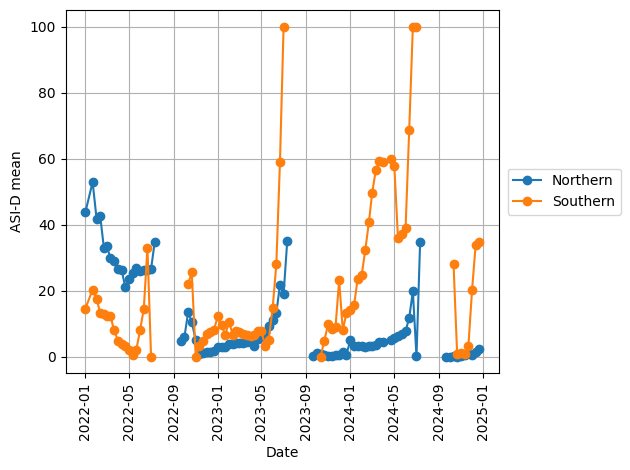

,Northern,Southern
2022-01-01,43.706417,14.543139
2022-01-21,52.923592,20.328814
2022-02-01,41.708263,17.408169
2022-02-11,42.523201,13.315154
2022-02-21,32.988071,12.848729
...,...,...
2024-11-11,0.570056,0.676129
2024-11-21,1.058348,3.304470
2024-12-01,0.471624,20.123503
2024-12-11,1.415507,33.871181


In [ ]:
# The .tif files were automatically downloaded to your out_dir. You can inspect them in QGIS.
# Now, we compute area statistics for the selected states and plot the average values across the entire states.

from vito_agri_tutorials.fao.asis import compute_area_stats, plot_stats

asi_stats = compute_area_stats(asi)
asi_stats = plot_stats(asi_stats, variable, "mean")
asi_stats

In [ ]:
# We extract the timeseries of dekadal VHI index values for the selected states.

from pathlib import Path
from vito_agri_tutorials.fao.asis import extract_asis_data

out_dir = Path('./results/asis')

variable = "VHI-D"
start_date = '2022-01-01'
end_date = '2024-12-31'
# No need to specify season or landcover for the VHI data.
season = None
landcover = None
write_tif = True

vhi = extract_asis_data(
    variable,
    gdf,
    out_dir,
    start_date=start_date,
    end_date=end_date,
    season=season,
    landcover=landcover,
    write_tif=write_tif,
    debug=False,)

Error reading file gs://fao-gismgr-asis-data/DATA/ASIS/MAPSET/VHI-D/ASIS.VHI-D.2024-12-D2.tif
'/vsigs/fao-gismgr-asis-data/DATA/ASIS/MAPSET/VHI-D/ASIS.VHI-D.2024-12-D2.tif' does not exist in the file system, and is not recognized as a supported dataset name.
Error reading file gs://fao-gismgr-asis-data/DATA/ASIS/MAPSET/VHI-D/ASIS.VHI-D.2024-12-D3.tif
'/vsigs/fao-gismgr-asis-data/DATA/ASIS/MAPSET/VHI-D/ASIS.VHI-D.2024-12-D3.tif' does not exist in the file system, and is not recognized as a supported dataset name.
Error reading file gs://fao-gismgr-asis-data/DATA/ASIS/MAPSET/VHI-D/ASIS.VHI-D.2024-12-D2.tif
'/vsigs/fao-gismgr-asis-data/DATA/ASIS/MAPSET/VHI-D/ASIS.VHI-D.2024-12-D2.tif' does not exist in the file system, and is not recognized as a supported dataset name.
Error reading file gs://fao-gismgr-asis-data/DATA/ASIS/MAPSET/VHI-D/ASIS.VHI-D.2024-12-D3.tif
'/vsigs/fao-gismgr-asis-data/DATA/ASIS/MAPSET/VHI-D/ASIS.VHI-D.2024-12-D3.tif' does not exist in the file system, and is not reco

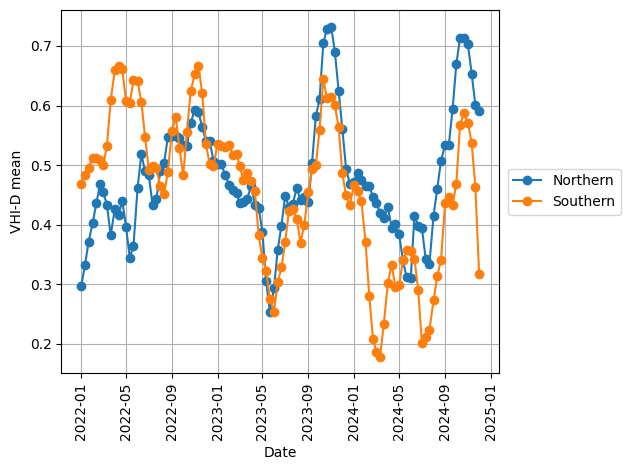

,Northern,Southern
2022-01-01,0.297276,0.467964
2022-01-11,0.331855,0.483391
2022-01-21,0.371673,0.495736
2022-02-01,0.403595,0.512354
2022-02-11,0.437310,0.511879
...,...,...
2024-10-21,0.713024,0.587192
2024-11-01,0.703458,0.571421
2024-11-11,0.653728,0.537874
2024-11-21,0.601072,0.463047


In [ ]:
# Again, we compute the mean statistics of VHI over the entire region.

from vito_agri_tutorials.fao.asis import compute_area_stats, plot_stats

vhi_stats = compute_area_stats(vhi)
vhi_stats = plot_stats(vhi_stats, variable, "mean")
vhi_stats

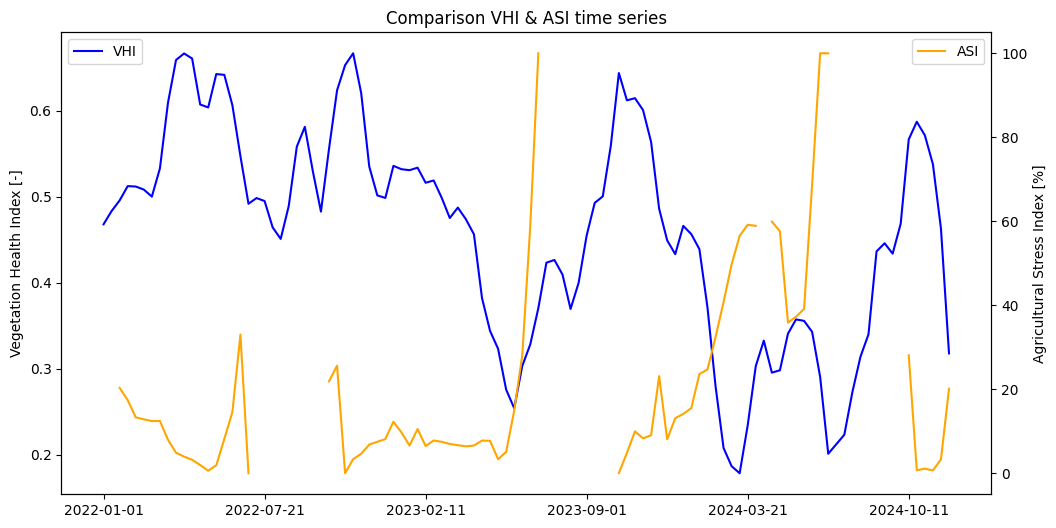

In [12]:
# Plot the VHI and ASI time series on the same figure for one of the selected states.

import matplotlib.pyplot as plt

state = "Southern"

# join the two relevant columns of a dataframe
df_vhi_asi = vhi_stats[[state]].join(asi_stats[[state]], lsuffix='_VHI', rsuffix='_ASI')
# rename the columns
df_vhi_asi.columns = ['mean_VHI', 'mean_ASI']

# Plot both variables on same figure
figs, ax1 = plt.subplots(1, figsize=(12, 6))
df_vhi_asi['mean_VHI'].plot(ax=ax1, label='VHI',color='blue')
ax2 = ax1.twinx()
df_vhi_asi['mean_ASI'].plot(ax=ax2, label='ASI',color="orange")

ax1.set_ylabel('Vegetation Health Index [-]')
ax1.legend(loc='upper left', ncol=5)
ax1.set_title('Comparison VHI & ASI time series')

# Set limits for both axes
ax2.set_ylabel('Agricultural Stress Index [%]')
ax2.legend(loc='upper right', ncol=5)

In [ ]:
# Download MVHI accumulated over entire growing season (MVHI-A)
# --> this can be used to check which individual pixels have suffered the most from the drought...

from pathlib import Path
from vito_agri_tutorials.fao.asis import extract_asis_data

out_dir = Path('./results/asis')

variable = "MVHI-A"
start_date = '2022-01-01'
end_date = '2024-12-31'
season = 1
landcover = "C"
sub_variable = None
write_tif = True


mvhi = extract_asis_data(variable,
                         gdf,
    out_dir,
    start_date=start_date,
    end_date=end_date,
    season=season,
    landcover=landcover,
    sub_variable=sub_variable,
    write_tif=write_tif,
    debug=False,)

Error reading file gs://fao-gismgr-asis-data/DATA/ASIS/MAPSET/DI-A/ASIS.DI-A.2024.GS1.LC-C.tif
'/vsigs/fao-gismgr-asis-data/DATA/ASIS/MAPSET/DI-A/ASIS.DI-A.2024.GS1.LC-C.tif' does not exist in the file system, and is not recognized as a supported dataset name.
Error reading file gs://fao-gismgr-asis-data/DATA/ASIS/MAPSET/DI-A/ASIS.DI-A.2024.GS1.LC-C.tif
'/vsigs/fao-gismgr-asis-data/DATA/ASIS/MAPSET/DI-A/ASIS.DI-A.2024.GS1.LC-C.tif' does not exist in the file system, and is not recognized as a supported dataset name.


In [19]:
# To get an idea how many people are directly affected by the drought, we can use the WPOP database.
from vito_agri_tutorials.fao.wpop import WPOP_SUPPORTED_VARIABLES
import pandas as pd

df_vars = pd.DataFrame.from_dict(WPOP_SUPPORTED_VARIABLES)
df_vars = df_vars.transpose()
df_vars

,unit,description
WPOP-T,people,Total population
WPOP-D,people/km²,Population density


In [ ]:
# Download population count data for the selected states.

from pathlib import Path
from vito_agri_tutorials.fao.wpop import extract_wpop_data

variable = "WPOP-T"

out_dir = Path('./results/wpop')

# WPOP data only available between 2000 and 2020
start_date = '2020-01-01'

wpop = extract_wpop_data(
    variable,
    gdf,
    out_dir,
    start_date,
    write_tif=True,
    debug=True,
)

In [20]:
# Compute total number of people in the state:

from vito_agri_tutorials.fao.wpop import compute_area_stats

wpop_stats = compute_area_stats(wpop)
wpop_stats

{'Northern': {'2020-01-01': {'mean': np.float32(14.679473),
   'min': np.float32(0.0),
   'max': np.float32(8156.4497),
   'std': np.float32(65.31395),
   'sum': np.float32(2532370.5)}},
 'Southern': {'2020-01-01': {'mean': np.float32(21.259233),
   'min': np.float32(0.053454902),
   'max': np.float32(3696.1287),
   'std': np.float32(79.46977),
   'sum': np.float32(2161022.2)}}}